# Hypothyroidism Indicator Model

# 1.Defining the Question



## a) Specifying the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 

From the healthcare dataset provided, I'll be building models that determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b) Defining the metric of success

The models will be considered successful if they have an accuracy of 90% and above.

## c) Understanding the context

The data was gotten from Nairobi Hospital after a medical camp they conducted. 

## d) Recording the Experimental Design

For this project, I'll be doing the following:
1. Data cleaning
2. Exploratory Data Analysis with focus on univariate and bivariate analysis
3. Decision Trees
4. Support Vector Machine

The different models built will allow me to assess their suitability and appropriateness in solving the given problem. 

## e) Data relevance

The data provided is of relevance to the question.

# 2.Reading the Data

In [0]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
# Load the Dataset

df = pd.read_csv('/content/hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# 3.Checking the Data

In [0]:
# Determine the no of records in the dataset
df.shape

(3163, 26)

In [0]:
# Check datatypes of the columns

df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [0]:
# At a first glance, there are ? in some columns.
# Check the counts of unique values in each column

df['status'].value_counts()

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [0]:
df['age'].value_counts()

?     446
59     64
60     64
62     63
28     60
     ... 
8       1
93      1
7       1
97      1
4       1
Name: age, Length: 93, dtype: int64

In [0]:
df['sex'].value_counts()

F    2182
M     908
?      73
Name: sex, dtype: int64

In [0]:
df['on_thyroxine'].value_counts()

f    2702
t     461
Name: on_thyroxine, dtype: int64

In [0]:
df['query_on_thyroxine'].value_counts()

f    3108
t      55
Name: query_on_thyroxine, dtype: int64

In [0]:
df['on_antithyroid_medication'].value_counts()

f    3121
t      42
Name: on_antithyroid_medication, dtype: int64

In [0]:
df['thyroid_surgery'].value_counts()

f    3059
t     104
Name: thyroid_surgery, dtype: int64

In [0]:
df['query_hypothyroid'].value_counts()

f    2922
t     241
Name: query_hypothyroid, dtype: int64

In [0]:
df['query_hyperthyroid'].value_counts()

f    2920
t     243
Name: query_hyperthyroid, dtype: int64

In [0]:
df['pregnant'].value_counts()

f    3100
t      63
Name: pregnant, dtype: int64

In [0]:
df['sick'].value_counts()

f    3064
t      99
Name: sick, dtype: int64

In [0]:
df['tumor'].value_counts()

f    3123
t      40
Name: tumor, dtype: int64

In [0]:
df['lithium'].value_counts()

f    3161
t       2
Name: lithium, dtype: int64

In [0]:
df['goitre'].value_counts()

f    3064
t      99
Name: goitre, dtype: int64

In [0]:
df['TSH_measured'].value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

In [0]:
df['TSH'].value_counts()

0       894
?       468
0.90     76
0.70     75
0.80     69
       ... 
0.92      1
200       1
9.40      1
90        1
37        1
Name: TSH, Length: 240, dtype: int64

In [0]:
df['T3_measured'].value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

In [0]:
df['T3'].value_counts()

?        695
1.60     141
1.80     141
2.10     139
1.70     138
        ... 
5.20       1
5.60       1
10.20      1
9.80       1
0          1
Name: T3, Length: 70, dtype: int64

In [0]:
df['TT4_measured'].value_counts()

y    2914
n     249
Name: TT4_measured, dtype: int64

In [0]:
df['TT4'].value_counts()

?       249
98       50
106      46
87       44
90       42
       ... 
287       1
267       1
29        1
204       1
8.60      1
Name: TT4, Length: 269, dtype: int64

In [0]:
df['T4U_measured'].value_counts()

y    2915
n     248
Name: T4U_measured, dtype: int64

In [0]:
df['T4U'].value_counts()

?       248
0.98     86
0.99     81
0.96     80
1.01     80
       ... 
0.30      1
0.27      1
1.61      1
2.03      1
1.94      1
Name: T4U, Length: 159, dtype: int64

In [0]:
df['FTI_measured'].value_counts()

y    2916
n     247
Name: FTI_measured, dtype: int64

In [0]:
df['FTI'].value_counts()

?      247
107     55
98      55
96      54
105     48
      ... 
257      1
247      1
650      1
345      1
264      1
Name: FTI, Length: 281, dtype: int64

In [0]:
df['TBG_measured'].value_counts()

n    2903
y     260
Name: TBG_measured, dtype: int64

In [0]:
df['TBG'].value_counts()

?       2903
28        14
23        13
25        13
21        13
20        12
31        12
30        12
19        10
33        10
27        10
29        10
36         9
26         9
32         9
16         8
17         8
38         7
18         7
34         6
110        5
39         5
35         5
40         4
37         4
22         4
108        4
14         3
24         3
43         3
13         2
65         2
15         2
41         2
53         2
52         1
11         1
3.10       1
12         1
48         1
0          1
50         1
80         1
69         1
8.40       1
8.50       1
122        1
86         1
7.30       1
63         1
47         1
45         1
9.30       1
Name: TBG, dtype: int64

In [0]:
# Check the descriptive statistics

df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# 4.External Data Source Validation

# 5.Tidying the Dataset

In [0]:
# Change the categorical values to numerical ones

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

df['status'] = en.fit_transform(df['status'])
df['sex'] = df['sex'].replace({'M':0, 'F':1})
df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0})

df.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.60,1,15,1,1.48,1,10,0,?
1,0,15,1,1,0,0,0,0,0,0,0,0,0,0,1,145,1,1.70,1,19,1,1.13,1,17,0,?
2,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.20,1,4,1,1,1,0,0,?
3,0,24,1,0,0,0,0,0,0,0,0,0,0,0,1,430,1,0.40,1,6,1,1.04,1,6,0,?
4,0,77,0,0,0,0,0,0,0,0,0,0,0,0,1,7.30,1,1.20,1,57,1,1.28,1,44,0,?


In [0]:
# Check the descriptive statistics

df.describe()

,status,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,0.780272,0.921277,0.921593,0.921910,0.082200
std,0.213248,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,0.414128,0.269348,0.268853,0.268356,0.274713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Change the ?'s to NaN values so they can be replaced with the appropriate values since I won't be deleting them

df.replace(to_replace='?', inplace=True, value=np.NaN)


In [0]:
# Check the datatypes in each column

df.dtypes

status                         int64
age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
TBG_measured                   int64
TBG                           object
dtype: object

In [0]:
# Change the datatype columns from object to int or float

# Columns with dtype as 'object'
cols = df.columns[df.dtypes.eq('object')]

# Convert to numeric values
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [0]:
# Replace the NaN values with the mean/median

df['age'].fillna(df['age'].mean(), inplace = True)
df['sex'].fillna(0, inplace = True)
df['TSH'].fillna(df['TSH'].mean(), inplace = True)
df['T3'].fillna(df['T3'].median(), inplace = True)
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['FTI'].fillna(df['FTI'].median(), inplace = True)
df['T4U'].fillna(df['T4U'].mean(), inplace = True)
df['TBG'].fillna(df['TBG'].mean(), inplace = True)

In [0]:
# Check for missing values

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# Check for duplicated values

df.duplicated().any()

True

In [0]:
# Drop the duplicated columns

df.drop_duplicates(keep = False, inplace = True)

In [0]:
# Check whether changes have been made

df.duplicated().any()

False

In [0]:
# Check for outliers

# Find IQR Score first

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

status                        0.00000
age                          26.00000
sex                           1.00000
on_thyroxine                  0.00000
query_on_thyroxine            0.00000
on_antithyroid_medication     0.00000
thyroid_surgery               0.00000
query_hypothyroid             0.00000
query_hyperthyroid            0.00000
pregnant                      0.00000
sick                          0.00000
tumor                         0.00000
lithium                       0.00000
goitre                        0.00000
TSH_measured                  0.00000
TSH                           5.92318
T3_measured                   0.00000
T3                            0.70000
TT4_measured                  0.00000
TT4                          38.00000
T4U_measured                  0.00000
T4U                           0.19000
FTI_measured                  0.00000
FTI                          33.00000
TBG_measured                  0.00000
TBG                           0.00000
dtype: float

In [0]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


# True indicates the prescence of an outlier

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False
1,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3161,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [0]:
# Remove the outliers

df_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers.shape

(1226, 26)

In [0]:
# Export the cleaned dataset

df_outliers.to_csv('df_clean.csv')

In [0]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.head()

,Unnamed: 0,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,151,1,20.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.5,1,1.8,1,68.0,1,0.99,1,68.0,0,31.283077
1,153,1,29.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,2.5,1,83.0,1,0.93,1,89.0,0,31.283077
2,154,1,45.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1.9,1,1.0,1,82.0,1,0.73,1,112.0,0,31.283077
3,156,1,56.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.8,1,76.0,1,0.77,1,99.0,0,31.283077
4,158,1,62.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.4,1,2.2,1,103.0,1,0.99,1,104.0,0,31.283077


# 8.Support Vector Machine

## Model 1: SVM Linear kernel

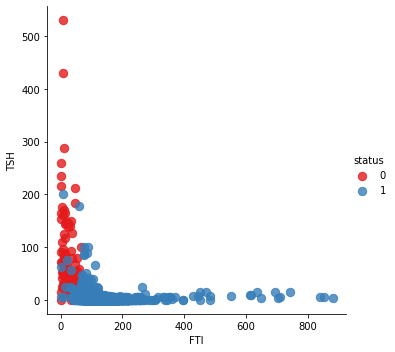

In [0]:
# I'll use the 2 most important features I got from the random forest model; FTI and TSH

# Plotting our desired features

sns.lmplot('FTI','TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [0]:
# Define the X and y variables

test_features = ['TSH', 'FTI']

X = df[test_features].values
y = df['status'].values

In [0]:
#  Split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Fit the model first without hyperparameter tuning

model = SVC(kernel= 'linear')
clf_model = model.fit(X_train, y_train)

In [0]:
# Print prediction results

y_pred = model.predict(X_test) 
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.96      0.85      0.90       602
weighted avg       0.99      0.99      0.99       602



We got 0.99 % accuracy without hyperparameter tuning. 

The recall and precision for class 0 are less than those for class 1. This shows that the classifier classfies more things into class 1 than 0 and could thus need to have its parameters tuned. 


In [0]:
# Use GridSearchCV to do hyperparameter tuning

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],   
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.983, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.983, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.979, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.985, total=   0.0s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. C=1, kernel=linear, score=0.983, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.983, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.979, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.979, total=   0.1s
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.985, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.983, total=   0.9s
[CV] C=10, kernel=linear .............................................
[CV] ................. C=10, kernel=linear, score=0.983, total=   0.7s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.96      0.85      0.90       602
weighted avg       0.99      0.99      0.99       602



The classification report of the base model and the hypertuned one are similar. This shows that optimizing the base model had no effect. It was already at optimum.

## Model 2: SVM rbf kernel

In [0]:
# Define the X and y variables

test_features = ['TSH', 'FTI']

X = df[test_features].values
y = df['status'].values

In [0]:
#  Split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Build the model first without hyperparameter tuning

rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set

rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Do predictions

y_pred = rbfclassifier.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.97      0.89      0.93       602
weighted avg       0.99      0.99      0.99       602



We got 0.99 % accuracy without hyperparameter tuning. 

The recall and precision for class 0 are less than those for class 1. This shows that the classifier classfies more things into class 1 than 0 and could thus need to have its parameters tuned. 

In [0]:
# Use GridSearchCV to do hyperparameter tuning

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],   
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf']}  
              
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.956, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.99      1.00      1.00       579

    accuracy                           0.99       602
   macro avg       0.97      0.93      0.95       602
weighted avg       0.99      0.99      0.99       602



The tuned rbf model gives better results than the base model that wasn't tuned.

The accuracy stays the same at 0.99 but the recall and precision for class 0 are better than it was for the base model.

## Model 3: SVM polynomial kernel

In [0]:
# Define the X and y variables

test_features = ['TSH', 'FTI']

X = df[test_features].values
y = df['status'].values

In [0]:
#  Split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Build the model without hyperparameter tuning

polyclassifier = SVC(kernel='poly')

# Train the model using the training set

polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Do predictions
y_pred = polyclassifier.predict(X_test)

print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.99      0.99      0.99       579

    accuracy                           0.99       602
   macro avg       0.93      0.91      0.92       602
weighted avg       0.99      0.99      0.99       602



In [0]:
# Do hyperparameter tuning manually

polyclassifier1 = SVC(kernel='poly',degree=3, gamma=1, C = 1.0)

# Train the model using the training set

polyclassifier1.fit(X_train, y_train)

In [0]:
# Do predictions
y_pred1 = polyclassifier1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.99      0.99      0.99       579

    accuracy                           0.99       602
   macro avg       0.92      0.87      0.89       602
weighted avg       0.98      0.99      0.98       602



The base polynomial model gives better results than the tuned model.

The accuracy stays the same at 0.99 but the recall and precision for class 0 are worse than it was for the base model.

## Observation

Of the 3 SVM models, the rbf kernel performed best, judging by their classification reports.

## Model with additional features

In [0]:
# Build a new rbf model but this time using all the features

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

X = df[test_features].values
y = df['status'].values

In [0]:
#  Split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
grid = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Fit the hypertuned model on to the train set

grid.fit(X_train, y_train) 

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_predictions)) 

              precision    recall  f1-score   support

           0       0.88      0.61      0.72        23
           1       0.98      1.00      0.99       579

    accuracy                           0.98       602
   macro avg       0.93      0.80      0.85       602
weighted avg       0.98      0.98      0.98       602



The model built with 2 features performs way better than the one built with all features.

The recall and precision for class 0 are less than those for class 1 in this model. The accuracy is also less at 0.98. This shows that the classifier classfies more things into class 1 than 0 and removing unnecessary features greatly improves the scores.

Thus the rbf tuned model with only 2 features solves the problem question best.

# 9.Implementing the Solution

The model that works best in determining whether a patient's symptoms indicate whether they have hypothyroididsm or not is the SVM rbf model. 

# 10.Challenging the Solution

The SVM kernel model could however be more fine tuned by giving an even wider range for the parameter grid when tuning.

This could further elevate it's performance.


# 11.Follow up Questions

**1. Did we have the right data**

The data provided for this question was relevant and yielded good results

**2. Do we need other data to answer our questions**

No. The data provided was sufficient

**3. Do we have the right question**

The question was right for the data given